In [4]:
import pandas as pd
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from os.path import join
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [12]:
with open(join('data', 'credit.pkl'), 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

X_train.shape, X_test.shape

((1500, 3), (500, 3))

In [13]:
y_train.shape, y_test.shape

((1500,), (500,))

In [16]:
naive_model = GaussianNB()

# Treinar o modelo
naive_model.fit(X_train,y_train);

In [18]:
previsoes = naive_model.predict(X_test)

#  1 = Não paga empréstimo / 0 = Paga empréstimo
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [22]:
# Checar na mão se as previsões estão certas
certas, erradas = 0, 0 
for prev, real in zip(previsoes, y_test):
    if prev == real:
        certas += 1
    else:
        erradas += 1

print("Certas: " , certas/len(previsoes), " Erradas: ", erradas/len(previsoes))

Certas:  0.938  Erradas:  0.062


In [32]:
accuracy_score(y_test, previsoes)

0.938

[[428   8]
 [ 23  41]]


0.938

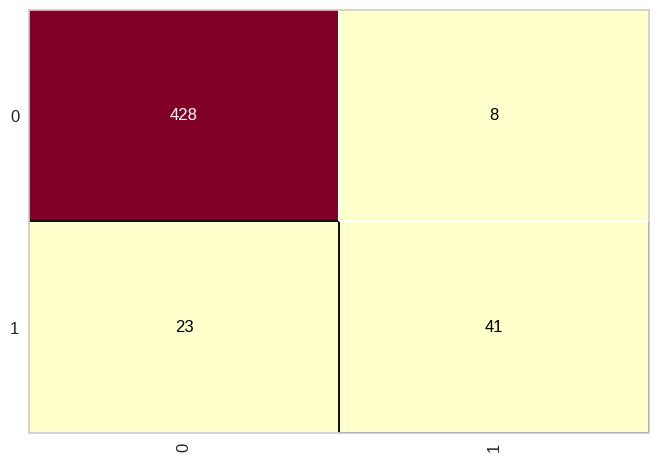

In [33]:
from yellowbrick.classifier import ConfusionMatrix

print(confusion_matrix(y_test, previsoes))

cm = ConfusionMatrix(naive_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [35]:
print(classification_report(y_test, previsoes))

# Recall = ele tem 64% de chance de identificar uma pessoa que não paga empréstimo (1)
# Precision = 84% das das vezes que ele identifica um (1), ele está certo. 
# Ou seja, o forte desse modelo é identificar quem vai pagar (0), ao invés de inadimplentes (1)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

